In [5]:
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving concrete_mix.csv to concrete_mix.csv


Dataset Loaded:
  SampleName  Cement  Microsilica  Rubber  Fiber  Water  Superplasticizer  \
0    Control   401.0         44.6     0.0    0.0  189.0             4.455   
1    Control   401.0         44.6     0.0    0.0  189.0             4.455   
2        PO1   396.9         44.1     0.0    8.9  187.1             2.205   
3        PO1   396.9         44.1     0.0    8.9  187.1             2.205   
4       SR10   401.0         44.6    46.1    0.0  189.0             2.228   

   CoarseAggregate  FineAggregate  CuringTemp  CompressiveStrength  
0            514.3         1242.6         -10                 17.6  
1            514.3         1242.6          25                 25.3  
2            510.8         1234.1         -10                 19.6  
3            510.8         1234.1          25                 28.0  
4            511.5         1121.8         -10                 16.4  

Model Performance:
MAE: 4.247657966613769
RMSE: 4.521876804729341
R²: -4.111842459287308


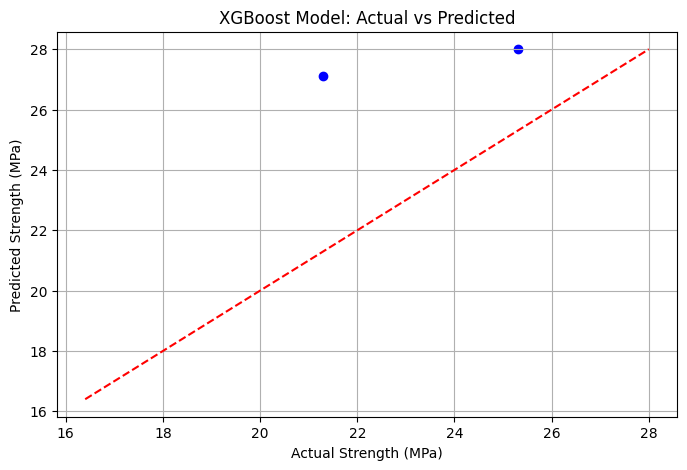

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Load data
df = pd.read_csv("concrete_mix.csv")
print("Dataset Loaded:")
print(df.head())

# Features & Target
X = df.drop(["SampleName", "CompressiveStrength"], axis=1)
y = df["CompressiveStrength"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nModel Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Plot: True vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("XGBoost Model: Actual vs Predicted")
plt.grid(True)
plt.show()

In [7]:
import pickle

with open("final_model.pkl", "wb") as f:
pickle.dump(model, f)

# دانلود مدل ذخیره شده
files.download("final_model.pkl")

IndentationError: expected an indented block after 'with' statement on line 3 (<ipython-input-7-e928b4fce361>, line 4)

In [4]:
from google.colab import files
files.download("concrete_mix.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>